In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [4]:
weather_dataset = pd.read_csv('E:/Kaggle Datasets/Weather_Dataset.csv')

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
weather_dataset

,M_PACKET_FORMAT,M_GAME_MAJOR_VERSION,M_GAME_MINOR_VERSION,M_PACKET_VERSION,M_PACKET_ID,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,M_SECONDARY_PLAYER_CAR_INDEX,...,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_IS_SPECTATING,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES,Unnamed: 58
0,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
1,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
2,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
3,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
4,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3572323,2021,1,14,1,1,1.086282e+19,683.047,22874,1,255,...,110,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
3572324,2021,1,14,1,1,1.086282e+19,683.047,22874,1,255,...,110,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
3572325,2021,1,14,1,1,1.086282e+19,683.047,22874,1,255,...,110,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
3572326,2021,1,14,1,1,1.086282e+19,683.047,22874,1,255,...,110,80,1.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN


In [6]:
weather_dataset.describe()

,M_PACKET_FORMAT,M_GAME_MAJOR_VERSION,M_GAME_MINOR_VERSION,M_PACKET_VERSION,M_PACKET_ID,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,M_SECONDARY_PLAYER_CAR_INDEX,...,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_IS_SPECTATING,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES,Unnamed: 58
count,3572328.0,3572328.0,3.572328e+06,3572328.0,3572328.0,3.572328e+06,3.572328e+06,3.572328e+06,3.572328e+06,3572328.0,...,3.572328e+06,3.572328e+06,3.572327e+06,3.572327e+06,3.572327e+06,3.572327e+06,3.572327e+06,3.572327e+06,3.572327e+06,0.0
mean,2021.0,1.0,1.410704e+01,1.0,1.0,8.239394e+18,1.019926e+03,2.857427e+04,9.212292e+00,255.0,...,4.595344e+01,7.583221e+01,2.261691e-01,1.709807e+02,1.580382e-01,1.487266e-03,6.307732e-01,3.153866e-01,1.687091e+01,NaN
std,0.0,0.0,3.091641e-01,0.0,0.0,5.119260e+18,1.682487e+03,5.428773e+04,9.217495e+00,0.0,...,3.811992e+01,8.123138e+00,4.183500e-01,6.422035e+01,3.647768e-01,3.853640e-02,9.293394e-01,4.646697e-01,1.092343e+00,NaN
min,2021.0,1.0,1.400000e+01,1.0,1.0,2.106082e+16,4.000000e-03,0.000000e+00,0.000000e+00,255.0,...,0.000000e+00,6.000000e+01,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,NaN
25%,2021.0,1.0,1.400000e+01,1.0,1.0,3.591802e+18,1.138000e+02,3.007000e+03,0.000000e+00,255.0,...,3.100000e+01,8.000000e+01,0.000000e+00,2.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,NaN
50%,2021.0,1.0,1.400000e+01,1.0,1.0,7.802116e+18,4.319240e+02,1.174900e+04,2.000000e+00,255.0,...,3.100000e+01,8.000000e+01,0.000000e+00,2.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,NaN
75%,2021.0,1.0,1.400000e+01,1.0,1.0,1.279207e+19,1.024212e+03,2.972400e+04,1.900000e+01,255.0,...,9.000000e+01,8.000000e+01,0.000000e+00,2.000000e+02,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,1.800000e+01,NaN
max,2021.0,1.0,1.500000e+01,1.0,1.0,1.826297e+19,9.686959e+03,3.339170e+05,1.900000e+01,255.0,...,1.100000e+02,8.000000e+01,1.000000e+00,2.000000e+02,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.900000e+01,NaN


In [9]:
weather_prediction_dataset = pd.read_csv('E:/Kaggle Datasets/Weather_Prediction.csv')

In [10]:
weather_prediction_dataset

,S.No.,Min Temp,Max Temp,Evaporation,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindGustDir9am,WindGustDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Clouds9am,Clouds3pm,Temp9am,Temp3pm,Rainfall Today,RISK_MM,Rainfall Tomorrow
0,1,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,2,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,3,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,4,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,5,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,362,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,363,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,364,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,365,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [11]:
weather_prediction_dataset.describe()

,S.No.,Min Temp,Max Temp,Evaporation,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Clouds9am,Clouds3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,183.500000,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,105.799338,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,1.000000,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,92.250000,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,183.500000,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,274.750000,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,366.000000,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


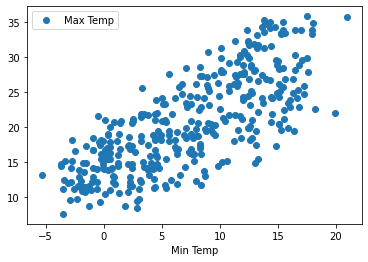

'matplotlib'

In [20]:
weather_prediction_dataset.plot(x = 'Min Temp', y = 'Max Temp', style = 'o')
plt.show()
pd.options.plotting.backend

In [29]:
? weather_prediction_dataset.plot

In [21]:
? plt.tight_layout

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Max Temp', ylabel='Density'>

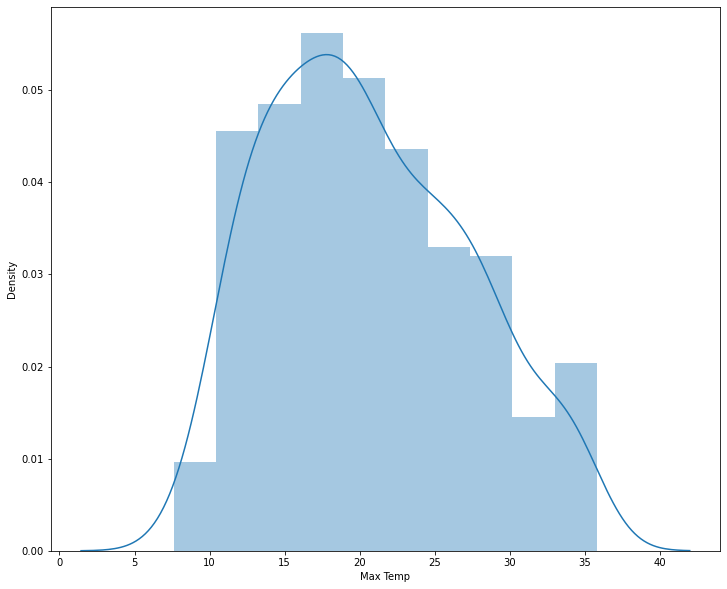

In [22]:
plt.figure(figsize = (12, 10))
plt.tight_layout()
sns.distplot(weather_prediction_dataset['Max Temp'])

<Figure size 864x720 with 0 Axes>

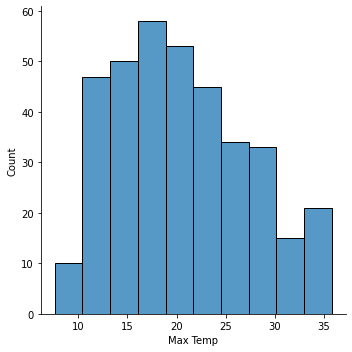

In [23]:
plt.figure(figsize = (12, 10))
plt.tight_layout()
sns.displot(weather_prediction_dataset['Max Temp'])

In [27]:
? plt.plot

<AxesSubplot:xlabel='Min Temp'>

<Figure size 720x864 with 0 Axes>

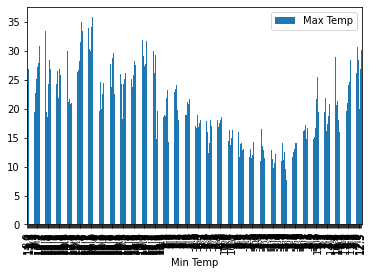

In [33]:
plt.figure(figsize = (10, 12))
weather_prediction_dataset.plot(x = 'Min Temp', y = 'Max Temp', kind = 'bar')

In [34]:
df = weather_prediction_dataset.head(30)

In [35]:
df

,S.No.,Min Temp,Max Temp,Evaporation,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindGustDir9am,WindGustDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Clouds9am,Clouds3pm,Temp9am,Temp3pm,Rainfall Today,RISK_MM,Rainfall Tomorrow
0,1,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,2,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,3,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,4,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,5,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
5,6,6.2,16.9,0.0,5.8,8.2,SE,44.0,SE,E,...,57,1023.8,1021.7,7,5,10.9,14.8,No,0.2,No
6,7,6.1,18.2,0.2,4.2,8.4,SE,43.0,SE,ESE,...,47,1024.6,1022.2,4,6,12.4,17.3,No,0.0,No
7,8,8.3,17.0,0.0,5.6,4.6,E,41.0,SE,E,...,57,1026.2,1024.2,6,7,12.1,15.5,No,0.0,No
8,9,8.8,19.5,0.0,4.0,4.1,S,48.0,E,ENE,...,48,1026.1,1022.7,7,7,14.1,18.9,No,16.2,Yes
9,10,8.4,22.8,16.2,5.4,7.7,E,31.0,S,ESE,...,32,1024.1,1020.7,7,1,13.3,21.7,Yes,0.0,No


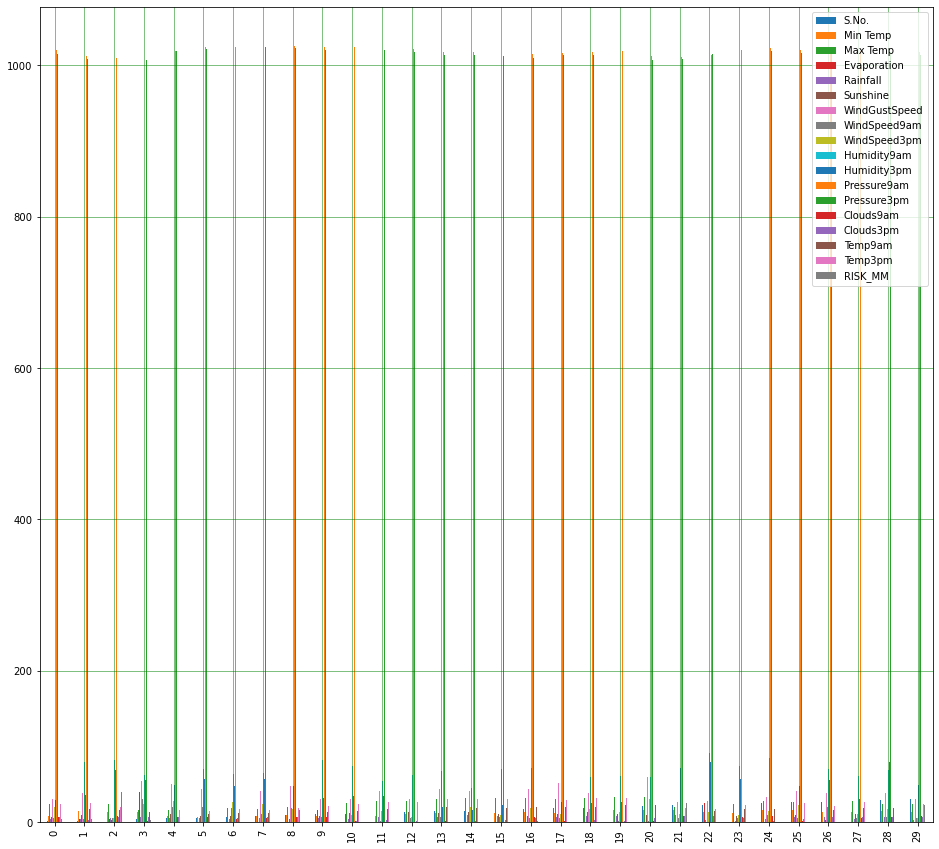

In [64]:
df.plot(kind = 'bar', figsize=(16, 15))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Linear Regression Analysis...

In [39]:
? weather_prediction_dataset.values.reshape

In [40]:
X = weather_prediction_dataset['Max Temp'].values.reshape(-1, 1)
Y = weather_prediction_dataset['Min Temp'].values.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
regr = LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

In [41]:
print(regr.intercept_)
print(regr.coef_)

[-6.40608092]
[[0.66505072]]


In [43]:
type(regr.coef_)

numpy.ndarray

In [44]:
type(regr.intercept_)

numpy.ndarray

In [46]:
? regr.predict

In [47]:
? regr

In [48]:
Y_pred = regr.predict(X_test)
dataframe = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})

In [49]:
dataframe

,Actual,Predicted
0,10.8,10.353197
1,-1.8,1.242002
2,15.5,7.626489
3,13.3,8.358045
4,15.1,7.160954
...,...,...
69,6.9,6.163378
70,16.0,8.757075
71,8.4,4.301236
72,12.7,10.286692


In [51]:
? Y_test.flatten

In [52]:
? Y_test.flatten

In [53]:
X_test

array([[25.2],
       [11.5],
       [21.1],
       [22.2],
       [20.4],
       [26.1],
       [34.9],
       [16.7],
       [14.3],
       [18.2],
       [18.4],
       [14.8],
       [11.6],
       [12.2],
       [17.3],
       [17.5],
       [14.1],
       [23.1],
       [16.3],
       [29.3],
       [19.6],
       [14.1],
       [35. ],
       [14. ],
       [16.2],
       [11.1],
       [30.3],
       [24.3],
       [28.6],
       [20.9],
       [28.2],
       [26. ],
       [32.1],
       [28.2],
       [21.7],
       [16.9],
       [33.5],
       [31.7],
       [11.6],
       [25.3],
       [17.5],
       [16.3],
       [18.5],
       [10.6],
       [33.4],
       [14.8],
       [14. ],
       [15.7],
       [14.8],
       [27.5],
       [18.9],
       [14.5],
       [12.9],
       [19.8],
       [23.8],
       [26.3],
       [20.4],
       [35.2],
       [33.9],
       [33.2],
       [21.9],
       [10.7],
       [17. ],
       [20.9],
       [16.2],
       [20. ],
       [26

In [54]:
X_train

array([[23.4],
       [16. ],
       [16.7],
       [25.5],
       [11.5],
       [18.7],
       [19.4],
       [22.4],
       [20.2],
       [23.1],
       [28.4],
       [16. ],
       [12.4],
       [14.8],
       [ 9.7],
       [12.5],
       [14.2],
       [18.5],
       [18.1],
       [15.5],
       [18.1],
       [32.3],
       [25.9],
       [34.1],
       [33.8],
       [27.9],
       [27.4],
       [20.5],
       [11.6],
       [21.2],
       [30. ],
       [15.1],
       [17.4],
       [19.4],
       [14. ],
       [16.7],
       [24.2],
       [15. ],
       [12.3],
       [ 9.3],
       [11.3],
       [11.3],
       [15.1],
       [18.9],
       [13. ],
       [19.9],
       [26.9],
       [23.3],
       [19.5],
       [12.2],
       [14.2],
       [18.9],
       [31.8],
       [ 7.6],
       [33.1],
       [12.2],
       [11. ],
       [26.5],
       [22.4],
       [21.8],
       [30.2],
       [27.4],
       [25.7],
       [14.4],
       [16.1],
       [23.4],
       [20

In [55]:
Y_test

array([[10.8],
       [-1.8],
       [15.5],
       [13.3],
       [15.1],
       [ 6.7],
       [18. ],
       [-0.9],
       [ 3.5],
       [ 6.1],
       [ 7.7],
       [13. ],
       [ 2.3],
       [ 2.3],
       [-1.5],
       [ 2.2],
       [ 2.4],
       [ 9.1],
       [ 7.4],
       [11.5],
       [11.6],
       [ 4.3],
       [15.4],
       [ 0. ],
       [-0.2],
       [-2.6],
       [16.5],
       [14.4],
       [12.7],
       [ 1.5],
       [10.1],
       [ 8.9],
       [12.4],
       [16.5],
       [11.3],
       [ 6.2],
       [13.8],
       [13.3],
       [-2.2],
       [16.7],
       [-0.3],
       [ 0.5],
       [-0.9],
       [ 1.3],
       [15.3],
       [ 4.1],
       [ 0.6],
       [ 4.6],
       [-1.5],
       [12.1],
       [ 5.6],
       [ 4.3],
       [ 0.9],
       [ 7.1],
       [16. ],
       [ 9.8],
       [ 9.2],
       [13.8],
       [17.9],
       [17.9],
       [ 3.2],
       [-1.6],
       [ 8.3],
       [10.4],
       [ 7.8],
       [ 0.5],
       [14

In [56]:
Y_train

array([[15.9],
       [ 1.2],
       [ 0.1],
       [ 9. ],
       [-1.6],
       [ 3.2],
       [16.4],
       [15.5],
       [12.6],
       [12.6],
       [ 7.1],
       [ 0.3],
       [ 5.8],
       [ 1.2],
       [-2.3],
       [ 3.1],
       [ 3.7],
       [12.8],
       [ 4.9],
       [ 5.4],
       [-2.7],
       [11.3],
       [11.5],
       [14.3],
       [12.3],
       [10.1],
       [11.3],
       [ 8.1],
       [ 2.3],
       [ 2.5],
       [11.7],
       [ 7.8],
       [13.1],
       [13.1],
       [ 4.2],
       [ 4.4],
       [14.5],
       [ 3.4],
       [ 7.9],
       [-0.3],
       [-2. ],
       [ 4.3],
       [-3.3],
       [ 4.2],
       [ 8.7],
       [15.9],
       [14. ],
       [ 5.3],
       [ 8.8],
       [-1. ],
       [-0.1],
       [ 0.4],
       [12.9],
       [-3.5],
       [13.2],
       [-2.8],
       [ 0.5],
       [13.3],
       [ 8.2],
       [14.5],
       [12.3],
       [13.6],
       [15.4],
       [ 9.8],
       [ 6.3],
       [ 7.1],
       [ 0

In [57]:
my_dataframe = dataframe.head(30)

In [58]:
my_dataframe   # I filtered out this dataframe to show the contrast between the actual and predicted results...

,Actual,Predicted
0,10.8,10.353197
1,-1.8,1.242002
2,15.5,7.626489
3,13.3,8.358045
4,15.1,7.160954
5,6.7,10.951743
6,18.0,16.804189
7,-0.9,4.700266
8,3.5,3.104144
9,6.1,5.697842


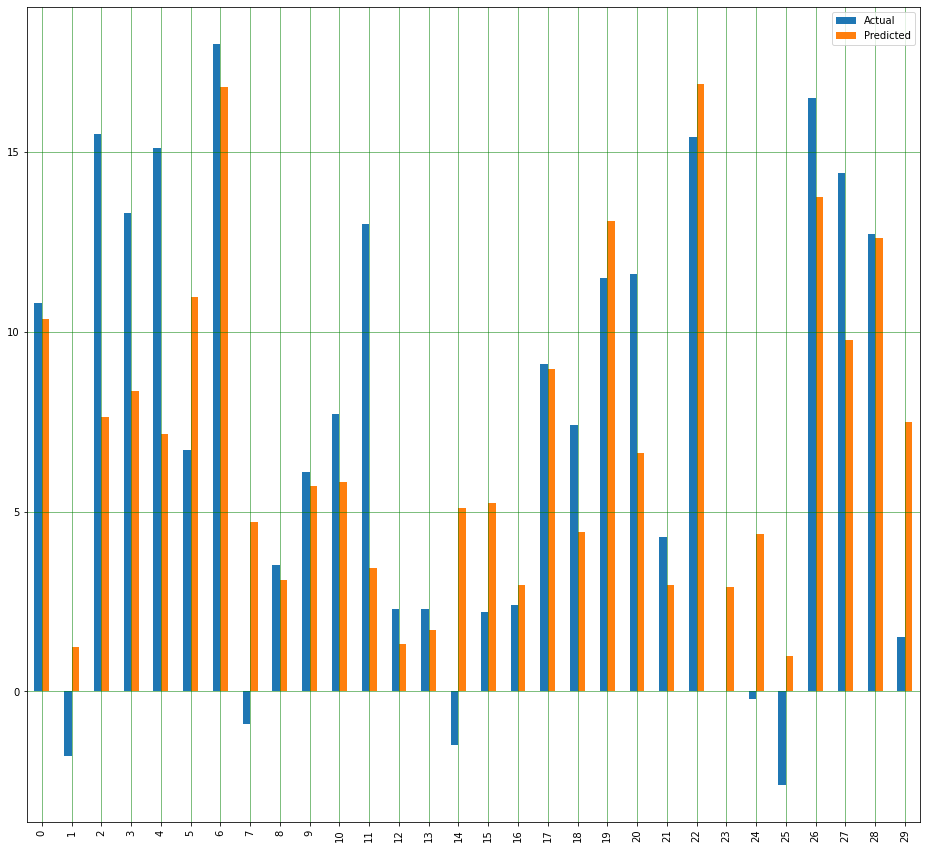

In [60]:
my_dataframe.plot(kind = 'bar', figsize = (16, 15))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

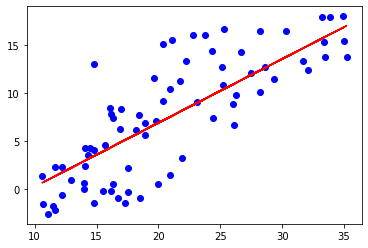

In [61]:
plt.scatter(X_test, Y_test, color = 'blue')
plt.plot(X_test, Y_pred, color = 'red')
plt.show()